## Data Preparation:
The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have "Null" values, which is something we will address in the feature engineering phase.


In [93]:
import pandas as pd    # explore, clean, load, prepare, manipulate, and analyze all kinds of structured data.    
import numpy as np  # NumPy is mainly used for its support for N-dimensional arrays. also used for cleaning and manupulation

import matplotlib.pyplot as plt
import seaborn as sns # used for data visualization and EDA
%matplotlib inline 

from datetime import datetime
import time

import warnings     
warnings.filterwarnings("ignore")

df = pd.read_csv("german_credit_data.csv")

In [94]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


**summary:**

We have **four** numeric variable, while others are all categorical variables..

The average age of people in our dataset is **35.54**

The average credit amount borrowed is **3271**






## Data preprocessing
#### Data preprocessing is the process of transforming raw data into an understandable format. 

In [95]:
# remove duplicate column id   
df.drop(df.columns[0], axis=1, inplace=True)  #inplace= t means data is updated instead of return copy
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [96]:
df.isna().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [97]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [98]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

### encode missing value as 'None'

In [127]:
col=['Saving accounts','Checking account']
df[col]=df[col].fillna('None')
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,None,None,9055,36,education,good
6,53,male,2,own,quite rich,None,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,None,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [100]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [102]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [103]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Expolatory data analysis
is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics

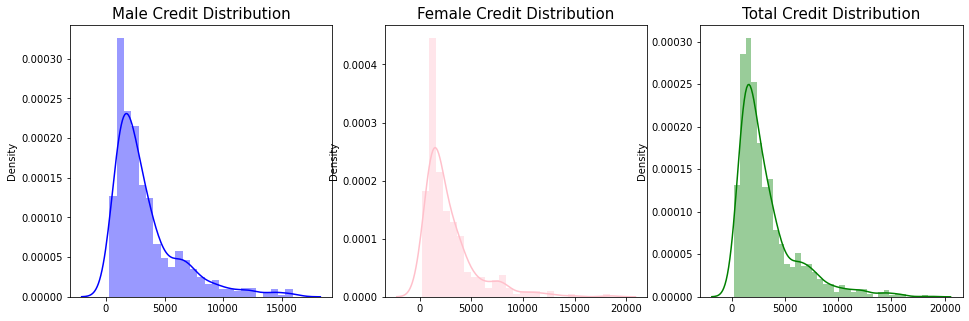

In [124]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(male_credit, ax=ax[0], color="blue")
ax[0].set_title("Male Credit Distribution", fontsize=15)
sns.distplot(female_credit, ax=ax[1], color="pink")
ax[1].set_title("Female Credit Distribution", fontsize=15)
sns.distplot(total_credit, ax=ax[2], color="green")
ax[2].set_title("Total Credit Distribution", fontsize=15)
plt.show()


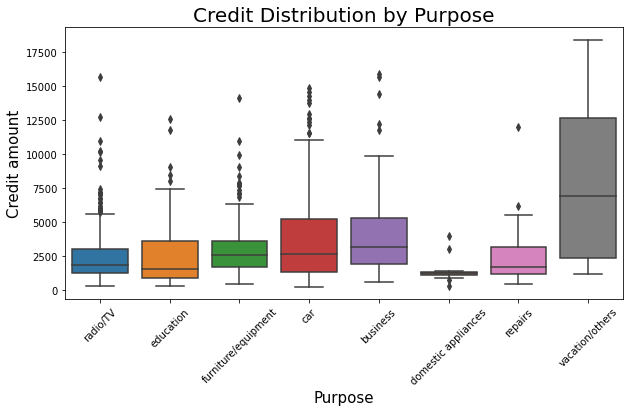

In [126]:
import seaborn as sns

plt.figure(figsize=(10,5)) #figure size
g = sns.boxplot(x='Purpose', y='Credit amount', data=df)


g.set_title("Credit Distribution by Purpose", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Purpose', fontsize=15) # Xlabel
g.set_ylabel('Credit amount', fontsize=15) 
plt.show()

<Figure size 360x216 with 0 Axes>

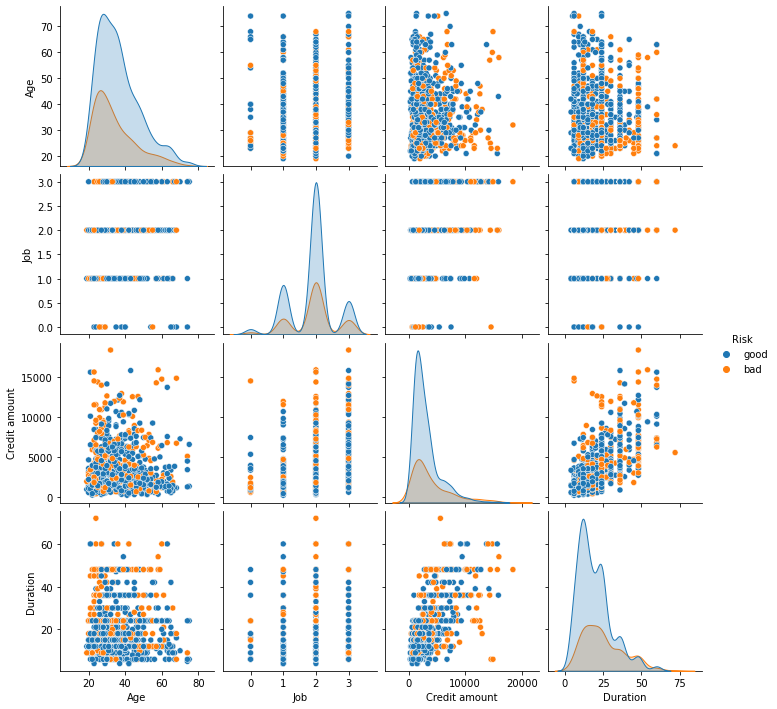

In [221]:
plt.figure(figsize=(5,3))
sns.pairplot(df, hue='Risk')
plt.show()

# Gender analysis
Find the distribution of genders in our dataset.

What were the main application reasons for a credit loan? Does it vary by Gender?

How many jobs does each gender have? How many are Unemployed?


In [161]:
# We have 2x more males applying for Credit Loans than Females.
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [139]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum()*100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [140]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


### Summary:

There is 2x more males than females in our dataset.

Females were more likely to apply for a credit loan to buy furniture and equipment. (8 % more than males)

Males applied 2x more than females for a credit loan to invest in a business.

More males were more likely to apply for a credit loan to buy car than females

Most people that applied for a credit loan have bought car.

2x of females were unemployed compared to males.

More males did 3 jobs compared to females.

Suprisingly, most people that applied for a credit loan have two jobs!

# Risk analysis:

In [143]:
df["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [166]:
risk_chances= pd.crosstab(df["Sex"], df["Risk"]).apply(lambda x: x/x.sum() * 100)
risk_chances

Risk,bad,good
Sex,,
female,36.333333,28.714286
male,63.666667,71.285714


In [170]:
# We have some missing value so we will just ignore the missing values in this analysis.

cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,None,little,moderate,rich
Risk,,,,
bad,11.675127,49.27,39.03,22.22
good,88.324873,50.73,60.97,77.78


In [203]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
5,35,male,1,free,None,None,9055,36,education,good
6,53,male,2,own,quite rich,None,2835,24,furniture/equipment,good


In [204]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

bad_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
4,53,male,2,free,little,little,4870,24,car,bad
9,28,male,3,own,little,moderate,5234,30,car,bad
10,25,female,2,rent,little,moderate,1295,12,car,bad
11,24,female,2,rent,little,little,4308,48,business,bad


In [205]:

cross_checking = pd.crosstab(df['Risk'], df['Credit amount']).apply(lambda x: x/x.sum() * 100)

cross_checking = cross_checking.round()
cross_checking 
                                                                    

Credit amount,250,276,338,339,343,362,368,385,392,409,...,14318,14421,14555,14782,14896,15653,15672,15857,15945,18424
Risk,,,,,,,,,,,,,,,,,,,,,
bad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0,100.0,100.0
good,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0


### Summary:
There is higher probability of "good risk" than bad risk in our dataset.
Males faced more bad risk loan than females

Individuals belonging to the "little wealth" group, had a higher probability of being bad risk loans than other types of groups.

The higher the wealth, the lower the probability of being a bad risk loan.

The younger age group tended to ask slightly for higher loans compared to the older age groups.

The higher the credit amount borrowed, the most likely the loan will end up bad.

The higher the duration of the loan, the most likely the loan will turn out to be bad

people that asked for loans over 12k, have a high chance of becoming bad loans